# Softmax
Actually softmax is derivative of logistic regression

details: https://github.com/Tangjacson/cs189/Reading%20note/r17.pdf


## practical part

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import time

In [5]:
mnist_train=torchvision.datasets.FashionMNIST(root='~/Datasets/FashionMNIST',
                                             train=True,download=True,transform=transforms.ToTensor())
mnist_test=torchvision.datasets.FashionMNIST(root='~/Datasets/FashionMNIST',
                                            train=False,download=True,transform=transforms.ToTensor())

In [6]:
X,Y=mnist_train[0]

Text(0.5, 1.0, 'ankle boot')

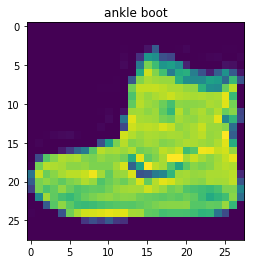

In [18]:
text_labels = ['t-shirt', 'trouser', 'pullover', 'dress',
'coat','sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
axes,fig=plt.subplots(1,1)
fig.imshow(X[0].view((28,28)).numpy())
fig.set_title(text_labels[Y])

In [19]:
import sys
batch_size=256
if sys.platform.startswith('win'):
    num_workers=0
else:
    num_workers=4
    
train_iter=torch.utils.data.DataLoader(mnist_train,batch_size=batch_size,
                                      shuffle=True,num_workers=num_workers)
test_iter=torch.utils.data.DataLoader(mnist_test,batch_size=batch_size,
                                      shuffle=True,num_workers=num_workers)

In [20]:
start=time.time()
for x,y in train_iter:
    continue
time.time()-start

14.25938105583191

In [22]:
import numpy as np
n_inputs=784
n_outputs=10

W=torch.tensor(np.random.normal(0,0.01,(n_inputs,n_outputs)),dtype=torch.float)
b=torch.zeros(n_outputs,dtype=torch.float)

In [23]:
W.requires_grad_(requires_grad=True)
b.requires_grad_(requires_grad=True)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True)

In [26]:
def softmax(X):
    X_exp=X.exp()
    partition=X_exp.sum(dim=1,keepdim=True)
    return X_exp/partition

In [28]:
def net(X):
    return softmax(torch.mm(X.view(-1,784),W)+b)

In [68]:
def accuracy(y_hat, y):
    return (y_hat.argmax(dim=1) == y).float().mean().item()

def loss(y_hat,y):
    return -torch.log(y_hat.gather(1,y.view(-1,1)))
def sgd(params,lr,batch_size):
    for param in params:
        param.data -= lr * param.grad / batch_size

In [69]:
def train():
    params=[W,b]
    lr=0.3
    for epoch in range(3):
        train_acc=0
        for x,y in train_iter:
            y_hat=net(x)
            l=loss(y_hat,y).sum()
            
            W.grad.data.zero_()
            b.grad.data.zero_()
            
            l.backward()
            
            sgd(params,lr,784)
            
            train_acc+= (y_hat.argmax(dim=1)==y).sum().item()
        print(epoch,train_acc)

In [70]:
train()

0 45033
1 48839
2 49548


In [73]:
from torch import nn
class LinearNet(nn.Module):
    def __init__(self,n_inputs,n_outputs):
        super(LinearNet,self).__init__()
        self.linear=nn.Linear(n_inputs,n_outputs)
        
    def forward(self,x):
        y=self.linear(x.view(1,-1))
        return y

net=LinearNet(n_inputs,n_outputs)

In [74]:
class FlattenLayer(nn.Module):
    def __init__(self):
        super(FlattenLayer, self).__init__()
    def forward(self, x): # x shape: (batch, *, *, ...)
        return x.view(x.shape[0], -1)

In [80]:
from collections import OrderedDict
net=nn.Sequential(
        OrderedDict([
            ('flatten',FlattenLayer()),
            ('linear',nn.Linear(n_inputs,n_outputs))
        ]))

In [81]:
from torch.nn import init
init.normal_(net.linear.weight, mean=0, std=0.01)
init.constant_(net.linear.bias, val=0)

Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True)

In [82]:
optimizer=torch.optim.SGD(net.parameters(),lr=0.1)

In [83]:
loss = nn.CrossEntropyLoss()

In [89]:
def train():
    params=[W,b]
    lr=0.3
    for epoch in range(3):
        train_acc=0
        for x,y in train_iter:
            y_hat=net(x)
            l=loss(y_hat,y).sum()
            
            W.grad.data.zero_()
            b.grad.data.zero_()
            
            l.backward()
            
            optimizer.step()
            
            train_acc+= (y_hat.argmax(dim=1)==y).sum().item()
        print(epoch,train_acc)

In [90]:
train()

0 28598
1 38228
2 39574
